In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('tmdb_5000_movies.csv')
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [14]:
df['year'] = df['release_date'].apply(lambda x: x.year)

In [24]:
df_yearly = df.groupby(['year'])[['budget', 'popularity', 'revenue', 'vote_average']].mean()

In [28]:
df_yearly_cnts = df.groupby(['year'])['id'].agg(['count'])

In [29]:
df_yearly = df_yearly.merge(df_yearly_cnts, how = 'left', left_index= True, right_index= True)
df_yearly.head()

,budget,popularity,revenue,vote_average,count
year,,,,,
1916.0,385907.0,3.232447,8394751.0,7.4,1
1925.0,245000.0,0.785744,22000000.0,7.0,1
1927.0,92620000.0,32.351527,650422.0,8.0,1
1929.0,189500.0,1.396524,2179000.0,6.3,2
1930.0,3950000.0,8.484123,8000000.0,6.1,1


In [60]:
df_cleaned = df_yearly[df_yearly['count'] > 5]
df_cleaned['profitability'] = df_cleaned['revenue'] / df_cleaned['budget']

/Users/Michael/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [61]:
df_cleaned.reset_index(inplace = True)
df_cleaned

,year,budget,popularity,revenue,vote_average,count,profitability
0,1962.0,4.744571e+06,24.279591,3.001075e+07,7.000000,7,6.325281
1,1963.0,8.712625e+06,14.881032,3.573040e+07,6.787500,8,4.100992
2,1964.0,5.298000e+06,22.989998,3.470145e+07,7.220000,10,6.549914
3,1965.0,6.100000e+06,13.120496,6.934456e+07,6.900000,8,11.367961
4,1966.0,2.162967e+06,21.250036,9.891667e+06,6.733333,6,4.573194
5,1968.0,4.201900e+06,22.748671,1.875545e+07,6.860000,10,4.463564
6,1969.0,5.444409e+06,10.600484,3.143859e+07,6.600000,10,5.774472
7,1970.0,8.570162e+06,7.051652,2.066807e+07,6.650000,12,2.411631
8,1971.0,3.217700e+06,11.922901,2.962418e+07,6.640000,10,9.206632
9,1972.0,1.579111e+06,26.540910,3.237586e+07,7.033333,9,20.502582


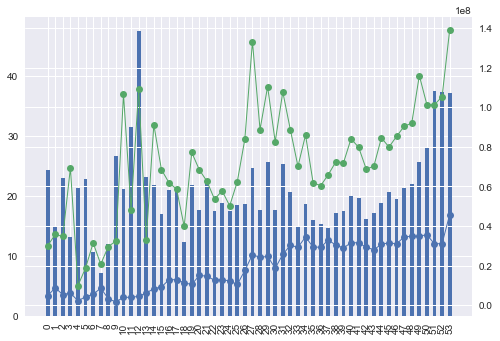

In [68]:
plt.clf()
fig = plt.figure()
ax = df_cleaned['popularity'].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(df_cleaned[['budget','revenue']].values, linestyle='-', marker='o', linewidth=1.0)
fig.set_axes()
plt.show()

In [63]:
df['profitability'] = df['revenue']/df['budget']

In [71]:
df = df.dropna(subset= ['profitability'])
df = df[df['popularity'] < 200]

In [72]:
df['popularity'].describe()

count    3902.000000
mean       24.330995
std        24.405186
min         0.001586
25%         7.723275
50%        16.996202
75%        32.788492
max       198.372395
Name: popularity, dtype: float64

In [80]:
plt.clf()
fig = sns.distplot(df['profitability'], kde = True, color = 'navy')
plt.title('Profitability histogram')
plt.show()

OverflowError: cannot convert float infinity to integer